## Different CCSN signals to classify

The sensitivity of the Einstein Telescope is expected to be several orders of magnitude higher than existing detectors like LIGO and Virgo. This enhanced sensitivity opens up new possibilities for detecting a wider range of gravitational wave sources and extracting more detailed information from the observed signals. We simulated the detector noise as in the case of the Einstein Telescope.

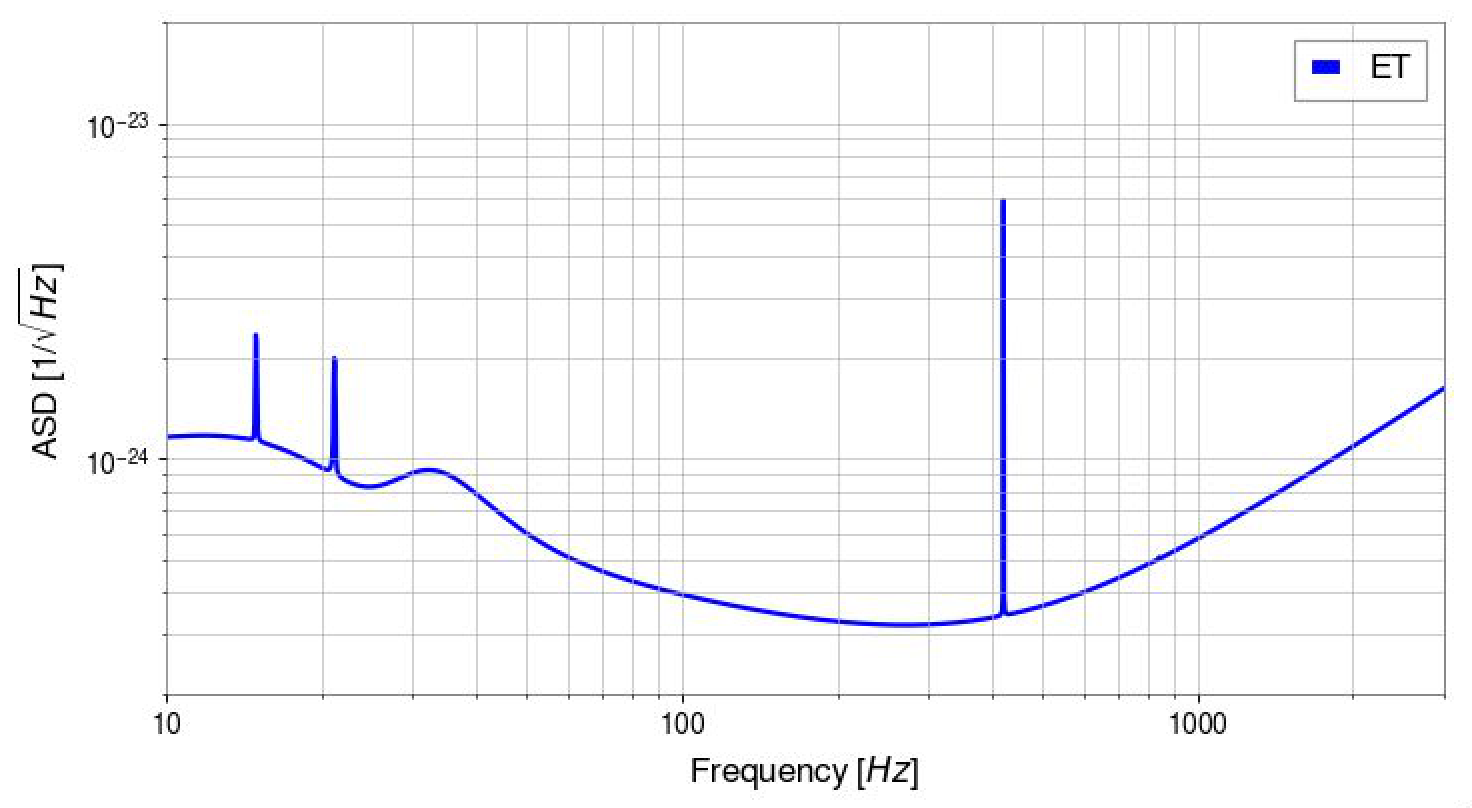

In [ ]:
from IPython import display
display.Image("ET_sensitivity.png")

By utilizing the ET sensitivity design as a foundation, we can simulate the expected noise conditions and explore their impact on the overall performance and accuracy of the detector.

# The data

In [ ]:
# Import the necessary modules
import os

# Attempt to import the 'wget' library for file downloading
try:
    import wget
except:
    # If the import fails, install 'wget' library using pip
    ! pip install -q "wget"

# Attempt to import the 'requests' library for making HTTP requests
try:
    import requests
except:
    # If the import fails, install 'requests' library using pip
    ! pip install -q "requests"

# Import the 'tqdm' library for progress tracking
import tqdm

# Define a function named 'download' that takes a URL and a filename as input
def download(url: str, filename: str):
    # Open the specified file in binary write mode ('wb')
    with open(filename, 'wb') as f:
        # Use the 'requests.get' method to make an HTTP GET request to the given URL,
        # and stream the response content
        with requests.get(url, stream=True) as r:
            # Check for HTTP request errors and raise an exception if encountered
            r.raise_for_status()

            # Get the total length of the content from the response headers
            total = int(r.headers.get('content-length', 0))

            # Define parameters for the tqdm progress bar
            tqdm_params = {
                'desc': url,           # Description for the progress bar
                'total': total,        # Total size of the content
                'miniters': 1,         # Minimum iterations before updating the progress bar
                'unit': 'B',           # Display units as bytes
                'unit_scale': True,    # Enable unit scaling (e.g., KB, MB, GB)
                'unit_divisor': 1024,  # Divisor for unit scaling
            }

            # Create a tqdm progress bar with the defined parameters
            with tqdm.tqdm(**tqdm_params) as pb:
                # Iterate over the content in chunks of size 8192 bytes
                for chunk in r.iter_content(chunk_size=8192):
                    # Update the progress bar with the length of the downloaded chunk
                    pb.update(len(chunk))

                    # Write the chunk to the specified file
                    f.write(chunk)


  Preparing metadata (setup.py) ... done


In [ ]:
# Import the necessary module
import os

# Define the URL of the file to be downloaded
url_orig = "https://owncloud.ego-gw.it/index.php/s/Ff4i0ccG1HIg0mc/download"

# Define the target directory where the downloaded data will be stored
target_data_path = '../../data/'

# Check if the target data directory doesn't exist
if not os.path.exists(target_data_path):
    # Create the target data directory if it doesn't exist
    os.mkdir(target_data_path)

# Define the target file path where the downloaded file will be saved
target_file = '../../data/datasets.tgz'

# Check if the target file doesn't exist
if not os.path.isfile(target_file):
    # If the file doesn't exist, download it using the 'download' function
    download(url_orig, target_file)


https://owncloud.ego-gw.it/index.php/s/Ff4i0ccG1HIg0mc/download: 100%|██████████| 412M/412M [04:39<00:00, 1.55MB/s]


In [ ]:
# Import the necessary module for working with tar files
import tarfile

# Define the target directory where the extracted data will be stored
target_path = '../../data/timeseries/'

# Check if the target directory doesn't exist
if not os.path.exists(target_path):
    # Create the target directory if it doesn't exist
    os.mkdir(target_path)

# Open the tar file for reading
tardata = tarfile.open(target_file)

# Extract all the contents of the tar file to the specified target directory
tardata.extractall(target_path)  # You can specify which folder to extract to within the target directory

# Close the tar file after extraction
tardata.close()


You have access to 4 different types of signals: 3 from core-collapse supernovae (CCSN) and 1 from chirp waveforms. Specifically, for CCSN, we have: Non Exploding, Neutrino Explosion Mechanism, and Magnetorotational Explosion Mechanism.

- Non Exploding: This type of CCSN signal represents cases where the core-collapse supernova event does not result in a successful explosion. The collapse of the stellar core occurs without a significant release of energy, leading to a lack of observable explosion-related gravitational waveforms.

- Neutrino Explosion Mechanism: The Neutrino Explosion Mechanism signals correspond to core-collapse supernovae that undergo a successful explosion primarily driven by neutrino interactions. In this scenario, the intense neutrino flux plays a crucial role in reviving the shock wave, leading to the release of gravitational wave energy.

- Magnetorotational Explosion Mechanism: The Magnetorotational Explosion Mechanism signals are associated with core-collapse supernovae in which the magnetic fields and rotation of the collapsing star contribute to the explosion mechanism. These signals exhibit distinct characteristics resulting from the interplay between magnetic fields, rotation, and the dynamics of the explosion.

- In addition to the CCSN signals, there is also a chirplet waveform available for analysis. These signals exhibit a characteristic "chirping" behavior, where the frequency and amplitude change over time.

By studying and classifying these diverse signal types, we aim to deepen our understanding of the physical processes behind core-collapse supernovae and binary mergers, enhance our ability to detect and interpret gravitational wave data, and gain insights into the astrophysical phenomena driving these events.


1. NON EXPLODING (modello z100) J. Powell, B. Müller, and A. Heger, Mon. Not. Roy. Astron. Soc. 503, 2108 (2021), 2101.06889.
2. NEUTRINO(s18):Monthly Notices of the Royal Astronomical Society, Volume 487, Issue 1, July 2019, Pages (edited)
3. MAGNETOROTATIONAL (m39): Monthly Notices of the Royal Astronomical Society, Volume 522, Issue 4, July 2023, Pages 6070–6086, https://doi.org/10.1093/mnras/stad1292

In [ ]:
try:
    import sklearn as sk
except:
    ! pip install -q "scikit-learn"

In [ ]:
try:
    import tensorflow as tf
except:
    ! pip install -q "tensorflow"

## 1-D CNN


One-Dimensional Convolutional Neural Network (1-D CNN) classification tasks are widely used in various fields, including natural language processing, signal processing, and time series analysis. Unlike traditional CNNs that operate on two-dimensional images, 1-D CNNs are specifically designed to handle sequential data, such as text or temporal data.

In a 1-D CNN classification task, the input data is typically represented as a sequence of features or values. For example, in natural language processing, a sentence can be represented as a sequence of word embeddings or one-hot encoded vectors. In signal processing, a time series can be represented as a sequence of amplitude values.

The key idea behind 1-D CNNs is to apply filters or convolutional operations to the input sequence, which helps capture local patterns and relationships between neighboring elements. These filters slide over the input sequence, computing a dot product between the filter weights and a local window of the input at each position. The resulting feature maps contain information about local patterns present in the input sequence.

To capture higher-level patterns and relationships, multiple convolutional layers can be stacked in a 1-D CNN architecture. Each layer can have different filter sizes and numbers, allowing the network to learn different levels of abstraction. Additionally, non-linear activation functions, such as ReLU (Rectified Linear Unit), are commonly applied after each convolutional operation to introduce non-linearity into the network.

After several convolutional layers, the output feature maps are typically flattened into a one-dimensional vector and passed through one or more fully connected layers. These fully connected layers learn to combine the extracted features and make predictions based on the learned representations. The final layer usually consists of softmax activation, which outputs class probabilities for multiclass classification tasks or a sigmoid activation for binary classification tasks.

During training, the 1-D CNN learns to minimize a loss function, such as categorical cross-entropy or binary cross-entropy, by adjusting the weights of the filters and fully connected layers through backpropagation. The model is optimized using gradient descent or one of its variants.

To prevent overfitting, common regularization techniques such as dropout or L1/L2 regularization can be applied. Additionally, techniques like batch normalization can help stabilize and speed up the training process.

1-D CNNs have shown great success in various tasks, such as sentiment analysis, document classification, speech recognition, and anomaly detection in time series data. They can effectively capture local patterns and dependencies while being computationally efficient, making them a powerful tool for analyzing and classifying sequential data.

### Let's have a look at the signal in time-domain
This data have been already whitened, so most of colored noise have been removed. We can have a look in the time-domain.

In [ ]:
# Import the required modules for plotting with matplotlib
import matplotlib.pyplot as plt

# Import modules for interactive display in IPython (Jupyter Notebook)
import IPython
import IPython.display

# Import the matplotlib library for customization
import matplotlib as mpl

# Import the numpy library for numerical operations
import numpy as np

# Configure the default figure size for matplotlib plots to (8, 6) inches
mpl.rcParams['figure.figsize'] = (8, 6)

# Disable grid lines in matplotlib plots by default
mpl.rcParams['axes.grid'] = False


In [ ]:
# reading the different waveforms
chirp= np.load(target_path+'chirp/'+'chirp_snr30_1.npy')
magrot=np.load(target_path+'magrot/'+'magrot_snr30_1.npy')
neutrino=np.load(target_path+'neutrino/'+'neutrino_snr30_1.npy')
noexp=np.load(target_path+'noexp/'+'noexp_snr30_1.npy')


Text(0.5, 1.0, 'No explosion mechanism')

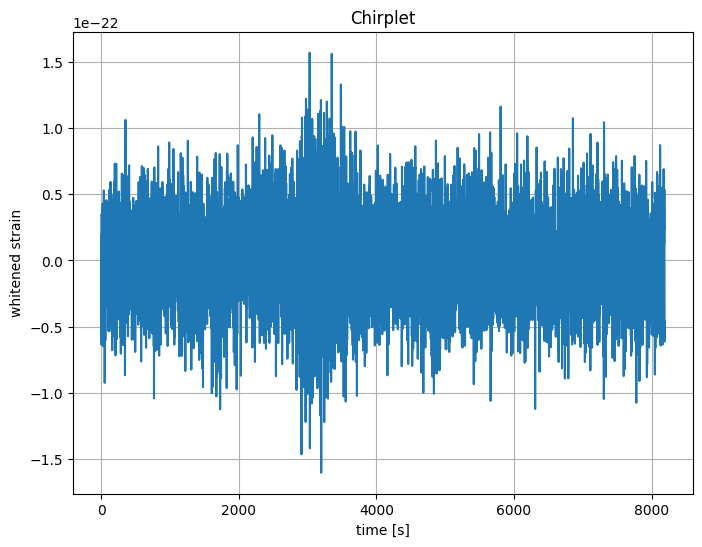

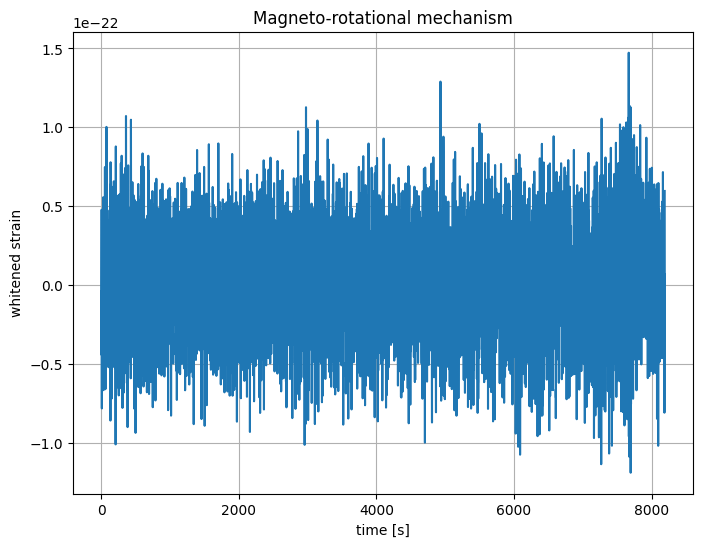

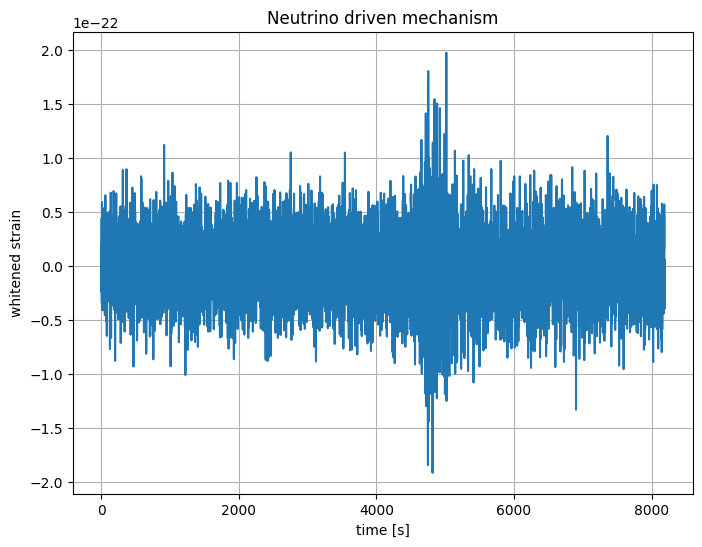

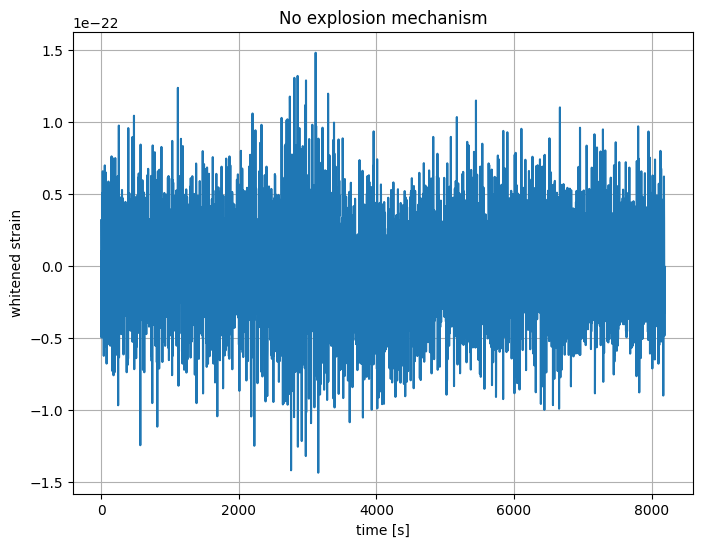

In [ ]:
# Uncomment the following line to use the 'widget' backend for interactive plots in Jupyter Notebook
# %matplotlib widget

# Create a new figure for the Chirplet plot
plt.figure()

# Customize the plot: add a grid, set labels for the x and y axes
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')

# Plot the 'chirp' data with the label 'Chirplet'
plt.plot(chirp, label='Chirplet')

# Set the title for this plot
plt.title('Chirplet')

# Create a new figure for the Magneto-rotational mechanism plot
plt.figure()

# Customize the plot: add a grid, set labels for the x and y axes
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')

# Plot the 'magrot' data with the label 'Magneto-rotational mechanism'
plt.plot(magrot, label='Magneto-rotational mechanism')

# Set the title for this plot
plt.title('Magneto-rotational mechanism')

# Create a new figure for the Neutrino driven mechanism plot
plt.figure()

# Customize the plot: add a grid, set labels for the x and y axes
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')

# Plot the 'neutrino' data with the label 'Neutrino driven mechanism'
plt.plot(neutrino, label='Neutrino driven mechanism')

# Set the title for this plot
plt.title('Neutrino driven mechanism')

# Create a new figure for the No explosion mechanism plot
plt.figure()

# Customize the plot: add a grid, set labels for the x and y axes
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')

# Plot the 'noexp' data with the label 'No explosion mechanism'
plt.plot(noexp, label='No explosion mechanism')

# Set the title for this plot
plt.title('No explosion mechanism')


### Load data and create data frame for analysis using time series as input

In [ ]:
os.listdir('../../data/timeseries/')

['noexp', 'neutrino', 'magrot', 'chirp']

In [ ]:
# Import the pandas library as 'pd' for working with dataframes
import pandas as pd

# Define the path to the directory containing embedded data files for 'chirp'
embed_path = target_path + 'chirp/'

# Create an empty list to store the loaded data
arr = []

# Iterate through the files in the 'embed_path' directory
for file in os.listdir(embed_path):
    # Load each data file using numpy and add it to the 'arr' list
    temp = np.load(embed_path + file)
    arr.append(temp)

# Create a pandas DataFrame from the list of loaded data
df_chirp = pd.DataFrame(arr)

# Display the first few rows of the DataFrame
df_chirp.head()


,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,2.269630e-23,-1.055468e-23,-1.988525e-23,-7.257361e-23,-9.002720e-23,-6.695386e-23,-3.218976e-23,-1.975012e-23,-3.246048e-23,-3.073335e-24,...,2.895221e-23,2.884045e-23,2.046839e-23,2.468734e-24,-5.465940e-24,1.423784e-23,8.341784e-24,2.247584e-23,-7.293832e-25,-3.480307e-23
1,3.867256e-24,-3.144825e-23,-1.526827e-23,-7.905806e-24,-1.375989e-23,-4.750231e-23,-7.891860e-25,3.600882e-24,3.177608e-23,-3.694636e-24,...,-2.856348e-23,-2.145876e-23,-1.143318e-23,-3.017464e-23,6.665112e-24,-1.281157e-23,-6.323314e-23,1.771837e-23,1.172708e-24,-3.079331e-23
2,3.263443e-23,-7.396162e-24,4.570261e-23,1.745193e-23,5.614354e-24,-4.138183e-23,-2.596299e-23,-2.693285e-23,-1.827072e-24,2.756391e-23,...,3.364634e-24,3.399750e-23,4.364689e-23,1.574675e-23,4.283894e-23,1.855429e-23,-5.749585e-23,-5.584282e-24,2.618656e-24,-3.763702e-23
3,1.093560e-23,2.006271e-23,4.135645e-23,6.754091e-24,-1.707758e-23,-1.595279e-23,2.680563e-23,4.068255e-23,5.854269e-23,1.776179e-24,...,-4.416294e-25,-7.294078e-23,-3.993591e-23,2.380605e-24,3.103957e-23,4.860463e-23,4.433346e-23,-4.088617e-23,-3.372996e-23,-4.306608e-23
4,-1.704083e-23,4.023871e-24,-1.500852e-23,-1.526286e-23,-1.415826e-23,1.714097e-23,4.654857e-23,1.514089e-23,2.959198e-23,-6.661839e-24,...,-2.302906e-23,4.131161e-23,6.691447e-23,6.147880e-23,5.257986e-23,5.860819e-23,6.569958e-25,-2.919917e-23,-2.304579e-23,-3.657373e-23


<Axes: >

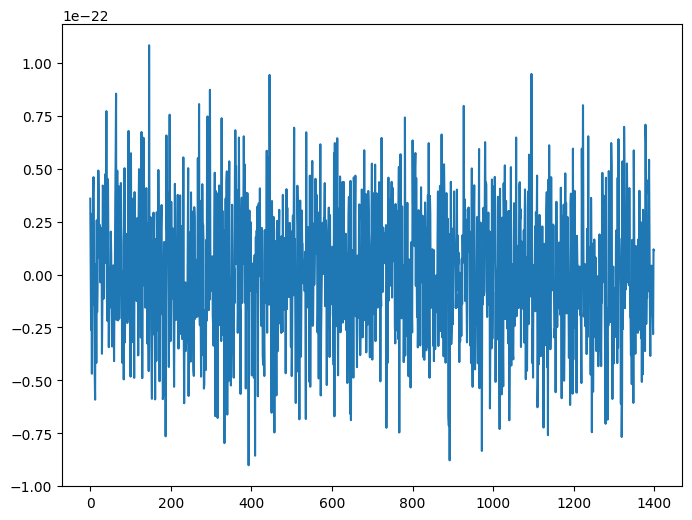

In [ ]:
df_chirp[10].plot()

### Add label column

In [ ]:
# Using 'label' as the column name
# and equating it to the list
df_chirp['label'] = 0 #chirplet


In [ ]:
df_chirp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,2.269630e-23,-1.055468e-23,-1.988525e-23,-7.257361e-23,-9.002720e-23,-6.695386e-23,-3.218976e-23,-1.975012e-23,-3.246048e-23,-3.073335e-24,...,2.884045e-23,2.046839e-23,2.468734e-24,-5.465940e-24,1.423784e-23,8.341784e-24,2.247584e-23,-7.293832e-25,-3.480307e-23,0
1,3.867256e-24,-3.144825e-23,-1.526827e-23,-7.905806e-24,-1.375989e-23,-4.750231e-23,-7.891860e-25,3.600882e-24,3.177608e-23,-3.694636e-24,...,-2.145876e-23,-1.143318e-23,-3.017464e-23,6.665112e-24,-1.281157e-23,-6.323314e-23,1.771837e-23,1.172708e-24,-3.079331e-23,0
2,3.263443e-23,-7.396162e-24,4.570261e-23,1.745193e-23,5.614354e-24,-4.138183e-23,-2.596299e-23,-2.693285e-23,-1.827072e-24,2.756391e-23,...,3.399750e-23,4.364689e-23,1.574675e-23,4.283894e-23,1.855429e-23,-5.749585e-23,-5.584282e-24,2.618656e-24,-3.763702e-23,0
3,1.093560e-23,2.006271e-23,4.135645e-23,6.754091e-24,-1.707758e-23,-1.595279e-23,2.680563e-23,4.068255e-23,5.854269e-23,1.776179e-24,...,-7.294078e-23,-3.993591e-23,2.380605e-24,3.103957e-23,4.860463e-23,4.433346e-23,-4.088617e-23,-3.372996e-23,-4.306608e-23,0
4,-1.704083e-23,4.023871e-24,-1.500852e-23,-1.526286e-23,-1.415826e-23,1.714097e-23,4.654857e-23,1.514089e-23,2.959198e-23,-6.661839e-24,...,4.131161e-23,6.691447e-23,6.147880e-23,5.257986e-23,5.860819e-23,6.569958e-25,-2.919917e-23,-2.304579e-23,-3.657373e-23,0
5,1.933610e-23,-7.046804e-24,-3.948721e-23,-4.726863e-23,-4.637716e-23,-1.584059e-23,1.360614e-23,4.423590e-23,-9.134628e-24,1.848601e-23,...,1.743450e-23,8.281914e-24,2.211969e-23,1.974005e-23,7.575393e-24,-1.783240e-23,-2.027299e-23,-2.656064e-23,-3.685623e-23,0
6,4.858564e-23,5.499071e-23,2.865812e-23,-8.739831e-24,-2.024618e-23,-5.513088e-23,-4.398641e-23,6.059128e-24,-2.593610e-23,-4.205731e-23,...,-1.387386e-23,-9.434722e-25,3.528313e-24,5.245288e-23,4.241609e-23,-2.725670e-23,6.590462e-24,-1.408809e-23,-7.413755e-24,0
7,-2.187262e-23,1.642278e-23,-3.467480e-24,-1.547327e-23,-5.343492e-23,-6.449402e-23,-5.542009e-23,-4.367866e-23,-1.645378e-23,1.238476e-23,...,3.354387e-23,2.595565e-23,-9.405598e-24,-1.584074e-25,2.048990e-23,-9.467471e-24,-1.859653e-23,-5.297517e-23,1.237966e-23,0
8,-9.439302e-23,-2.249223e-23,2.851726e-23,5.263834e-23,5.200708e-23,4.780070e-23,1.090830e-23,-4.378614e-23,-2.583026e-23,6.922151e-24,...,-9.116670e-24,3.240843e-23,-1.503738e-25,-4.108705e-23,2.908709e-24,-5.598148e-23,-2.461687e-23,-4.616265e-23,-1.172849e-23,0
9,-2.347865e-23,-7.923842e-24,6.058064e-23,2.083117e-23,-4.701367e-23,-6.052287e-24,5.111281e-23,3.545379e-23,-4.006560e-24,-1.195740e-23,...,-6.968899e-23,-1.472752e-23,1.871880e-23,2.179267e-23,7.365009e-24,2.859102e-23,3.445744e-23,1.822253e-23,3.668428e-23,0


In [ ]:
# Define the path to the directory containing embedded data files for 'magrot'
embed_path = target_path + 'magrot/'

# Create an empty list to store the loaded data
arr = []

# Iterate through the files in the 'embed_path' directory
for file in os.listdir(embed_path):
    # Load each data file using numpy and add it to the 'arr' list
    temp = np.load(embed_path + file)
    arr.append(temp)

# Create a pandas DataFrame from the list of loaded data
df_magrot = pd.DataFrame(arr)

# Add a new column 'label' to the DataFrame and assign the value 1 to it
df_magrot['label'] = 1  # Represents 'magneto-rotational'

# Display the first few rows of the DataFrame
df_magrot.head()


,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,1.407610e-23,1.091653e-23,5.577595e-23,4.425882e-25,-1.167086e-23,-1.125513e-23,1.449997e-23,1.130975e-23,-9.120479e-24,4.523051e-24,...,4.135311e-23,-1.612871e-23,-1.343576e-23,-1.573687e-23,-4.234941e-23,-7.410667e-23,-7.517067e-24,-3.363500e-24,-2.562582e-23,1
1,-2.245879e-23,-2.608829e-23,-5.352134e-24,-2.041033e-23,-2.357519e-23,4.648399e-23,1.811141e-23,-1.186623e-23,-2.400098e-23,-6.051503e-24,...,1.207401e-23,5.142201e-23,2.564406e-23,1.254993e-23,-4.078175e-23,-5.337885e-23,-1.093892e-23,4.274140e-23,2.207923e-23,1
2,6.209788e-23,2.386597e-23,1.543253e-23,2.140173e-23,1.609338e-23,-1.940690e-23,2.766508e-23,9.413684e-23,3.648817e-23,-2.736584e-23,...,4.184096e-25,-6.861804e-24,-2.937599e-23,-2.820874e-23,7.312569e-25,-7.748898e-24,3.442951e-23,2.388356e-23,2.212286e-23,1
3,6.628072e-24,5.193645e-23,-5.254796e-24,-4.037578e-24,-2.875192e-23,-7.288882e-23,-1.443327e-23,1.486058e-23,3.411548e-23,-1.207265e-23,...,5.103279e-24,4.154177e-23,3.931453e-23,1.520445e-23,6.241440e-24,2.456819e-23,1.038350e-23,-1.054475e-24,-2.974047e-23,1
4,-8.893038e-24,-1.478735e-23,-1.925263e-24,-1.371129e-23,-2.277021e-23,1.207740e-23,-2.329515e-24,-2.326030e-23,4.803207e-23,5.874905e-23,...,-4.244661e-23,-1.741945e-23,4.428628e-23,3.490102e-23,-1.141811e-23,-1.913546e-23,4.426546e-23,4.683511e-23,-3.839481e-23,1


In [ ]:
# Define the path to the directory containing embedded data files for 'neutrino'
embed_path = target_path + 'neutrino/'

# Create an empty list to store the loaded data
arr = []

# Iterate through the files in the 'embed_path' directory
for file in os.listdir(embed_path):
    # Load each data file using numpy and add it to the 'arr' list
    temp = np.load(embed_path + file)
    arr.append(temp)

# Create a pandas DataFrame from the list of loaded data
df_neutrino = pd.DataFrame(arr)

# Add a new column 'label' to the DataFrame and assign the value 2 to it
df_neutrino['label'] = 2  # Represents 'neutrino-driven'

# Display the first few rows of the DataFrame
df_neutrino.head()


,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,-6.517514e-24,-3.196748e-24,-2.072669e-23,-7.232946e-23,-4.424377e-23,-4.210613e-23,-7.367545e-24,3.458314e-25,-4.969792e-25,9.488910e-24,...,-5.126770e-23,-5.061909e-23,-3.466834e-23,-1.511961e-23,1.583801e-23,3.336773e-24,-2.851141e-23,2.375893e-23,-3.883314e-23,2
1,7.092422e-24,7.406063e-24,-1.433431e-23,-9.438571e-24,1.628365e-23,1.123708e-23,2.119888e-23,-8.740619e-25,-8.559981e-24,9.156869e-24,...,-2.214299e-23,2.520477e-24,6.335359e-24,1.843332e-23,-2.695733e-23,1.198830e-23,-9.333240e-24,-1.316837e-23,2.745240e-23,2
2,1.494196e-23,1.818468e-24,-7.875183e-24,-1.147222e-23,2.399825e-23,-4.652176e-23,-5.763423e-23,-5.988624e-23,-5.646203e-23,-1.680768e-23,...,2.832179e-23,-1.678547e-23,-2.871046e-23,1.429976e-23,-1.048852e-23,5.347227e-24,1.149998e-24,3.099048e-23,6.378718e-23,2
3,-4.445907e-23,1.122175e-23,2.944634e-24,1.418605e-23,2.214929e-23,2.360398e-23,9.703531e-24,3.021686e-23,-1.418096e-23,-2.678662e-23,...,-1.420056e-23,6.413438e-23,4.611236e-24,-2.753698e-23,1.845637e-23,-1.210988e-23,-1.568572e-23,-2.456114e-23,2.462400e-23,2
4,5.522344e-23,2.779225e-23,-3.317455e-23,5.835012e-24,8.491882e-24,-2.631758e-24,2.247224e-24,5.253536e-24,-1.551722e-23,-5.665594e-24,...,-8.520641e-24,5.761443e-24,1.117373e-23,-3.178674e-23,-3.113351e-23,-2.803385e-23,-6.116179e-24,1.975859e-23,1.030428e-24,2


In [ ]:
# Define the path to the directory containing embedded data files for 'noexp'
embed_path = target_path + 'noexp/'

# Create an empty list to store the loaded data
arr = []

# Iterate through the files in the 'embed_path' directory
for file in os.listdir(embed_path):
    # Load each data file using numpy and add it to the 'arr' list
    temp = np.load(embed_path + file)
    arr.append(temp)

# Create a pandas DataFrame from the list of loaded data
df_noexp = pd.DataFrame(arr)

# Add a new column 'label' to the DataFrame and assign the value 3 to it
df_noexp['label'] = 3  # Represents 'no explosion mechanism'

# Display the first few rows of the DataFrame
df_noexp.head()


,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,-1.007768e-23,-1.529214e-23,-3.092268e-23,5.330449e-24,2.344375e-24,-3.489049e-24,-7.300086e-24,1.968519e-23,4.548293e-23,-5.774243e-24,...,-2.599309e-23,-4.805994e-24,-4.314917e-23,-5.737492e-24,-7.103625e-24,-1.583522e-23,-2.143504e-23,3.049016e-23,6.193757e-23,3
1,-4.131098e-23,1.418043e-23,-5.289138e-24,-2.735181e-23,-2.384997e-23,-3.612262e-23,-3.618154e-23,6.542349e-24,-8.186402e-24,-6.791859e-24,...,3.147934e-23,1.401954e-23,-4.040751e-24,-5.277923e-23,-1.776899e-23,-2.798652e-24,-3.534174e-23,-1.677048e-23,-2.259055e-23,3
2,1.437279e-23,-2.695148e-23,-2.580147e-23,1.400636e-23,4.842741e-23,3.030279e-23,3.189314e-23,1.620464e-23,8.362889e-24,-6.825845e-24,...,1.750444e-23,2.800112e-23,8.717128e-24,-9.871387e-24,2.207963e-23,-1.457848e-23,-3.545450e-23,-3.318432e-23,2.723594e-23,3
3,2.277828e-23,1.165371e-23,3.232888e-23,6.056541e-24,-1.634985e-23,-4.464377e-23,-4.818950e-23,-4.947258e-23,1.701403e-23,4.473562e-23,...,8.648165e-23,7.098377e-23,6.470960e-23,1.054527e-22,3.306972e-23,-1.447000e-23,-7.280152e-23,-4.018353e-23,-1.990822e-23,3
4,-3.193313e-23,-3.294497e-23,-2.102775e-23,-5.685090e-23,-2.333998e-23,-2.017265e-23,-3.367569e-23,-2.521785e-23,4.250133e-23,9.422870e-23,...,-6.439885e-23,-8.305803e-23,1.089029e-23,2.900231e-24,-9.054171e-25,-4.427312e-23,1.793528e-23,1.932661e-23,-4.044292e-23,3


### Let's concatenate the pandas dataframes

In [ ]:
# Concatenate multiple DataFrames vertically (along the rows)
df_data = pd.concat([df_chirp, df_magrot, df_neutrino, df_noexp], axis=0)


In [ ]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,2.269630e-23,-1.055468e-23,-1.988525e-23,-7.257361e-23,-9.002720e-23,-6.695386e-23,-3.218976e-23,-1.975012e-23,-3.246048e-23,-3.073335e-24,...,2.884045e-23,2.046839e-23,2.468734e-24,-5.465940e-24,1.423784e-23,8.341784e-24,2.247584e-23,-7.293832e-25,-3.480307e-23,0
1,3.867256e-24,-3.144825e-23,-1.526827e-23,-7.905806e-24,-1.375989e-23,-4.750231e-23,-7.891860e-25,3.600882e-24,3.177608e-23,-3.694636e-24,...,-2.145876e-23,-1.143318e-23,-3.017464e-23,6.665112e-24,-1.281157e-23,-6.323314e-23,1.771837e-23,1.172708e-24,-3.079331e-23,0
2,3.263443e-23,-7.396162e-24,4.570261e-23,1.745193e-23,5.614354e-24,-4.138183e-23,-2.596299e-23,-2.693285e-23,-1.827072e-24,2.756391e-23,...,3.399750e-23,4.364689e-23,1.574675e-23,4.283894e-23,1.855429e-23,-5.749585e-23,-5.584282e-24,2.618656e-24,-3.763702e-23,0
3,1.093560e-23,2.006271e-23,4.135645e-23,6.754091e-24,-1.707758e-23,-1.595279e-23,2.680563e-23,4.068255e-23,5.854269e-23,1.776179e-24,...,-7.294078e-23,-3.993591e-23,2.380605e-24,3.103957e-23,4.860463e-23,4.433346e-23,-4.088617e-23,-3.372996e-23,-4.306608e-23,0
4,-1.704083e-23,4.023871e-24,-1.500852e-23,-1.526286e-23,-1.415826e-23,1.714097e-23,4.654857e-23,1.514089e-23,2.959198e-23,-6.661839e-24,...,4.131161e-23,6.691447e-23,6.147880e-23,5.257986e-23,5.860819e-23,6.569958e-25,-2.919917e-23,-2.304579e-23,-3.657373e-23,0


In [ ]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
count,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,...,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6.860000e+03,6860.000000
mean,-1.154286e-25,1.992662e-25,4.072668e-26,4.316962e-25,-8.984004e-26,-3.885260e-25,-5.203248e-25,-3.198366e-25,-1.561784e-25,-3.699297e-25,...,2.352687e-25,7.528212e-25,4.769597e-25,2.506924e-25,3.724512e-25,2.993824e-25,1.089722e-26,2.323462e-26,-3.282150e-25,1.612245
std,3.171068e-23,3.157392e-23,3.112911e-23,3.143923e-23,3.169810e-23,3.095817e-23,3.144115e-23,3.139637e-23,3.125542e-23,3.128270e-23,...,3.173373e-23,3.118135e-23,3.155357e-23,3.179212e-23,3.184786e-23,3.192141e-23,3.146015e-23,3.151346e-23,3.182152e-23,1.103254
min,-1.114915e-22,-1.188222e-22,-1.126240e-22,-1.192515e-22,-1.521944e-22,-1.040827e-22,-1.085423e-22,-1.127676e-22,-1.152216e-22,-1.404565e-22,...,-1.134229e-22,-1.002762e-22,-1.253854e-22,-1.416084e-22,-1.099815e-22,-1.270186e-22,-1.135999e-22,-1.036019e-22,-1.080391e-22,0.000000
25%,-2.186117e-23,-2.092958e-23,-2.102632e-23,-2.062727e-23,-2.140262e-23,-2.133481e-23,-2.123406e-23,-2.119582e-23,-2.114997e-23,-2.086939e-23,...,-2.145985e-23,-2.043356e-23,-2.102175e-23,-2.083553e-23,-2.103406e-23,-2.122239e-23,-2.106016e-23,-2.099988e-23,-2.189011e-23,1.000000
50%,7.938817e-26,1.645258e-25,-1.028661e-25,9.207509e-25,-3.870340e-25,-4.969366e-25,-3.028121e-25,-2.969213e-25,-2.591411e-25,-8.086205e-26,...,3.922354e-25,2.438891e-25,5.197890e-25,6.225029e-25,-1.702040e-25,1.312327e-25,-1.150576e-25,1.099492e-25,-8.233232e-25,2.000000
75%,2.143826e-23,2.226364e-23,2.134714e-23,2.174260e-23,2.117601e-23,2.079873e-23,2.029182e-23,2.070313e-23,2.027512e-23,2.088304e-23,...,2.212541e-23,2.202369e-23,2.138133e-23,2.175184e-23,2.233422e-23,2.150369e-23,2.105579e-23,2.114953e-23,2.182929e-23,3.000000
max,1.319586e-22,1.421489e-22,1.059948e-22,1.175505e-22,1.250333e-22,1.332875e-22,1.119018e-22,1.308741e-22,1.207442e-22,1.084012e-22,...,1.240241e-22,1.238775e-22,1.186891e-22,1.132978e-22,1.290592e-22,1.241744e-22,1.160320e-22,1.077904e-22,1.100704e-22,3.000000


### Let's prepare test, training and validation data sets

In [ ]:
# Import the 'train_test_split' function from the 'sklearn.model_selection' module
from sklearn.model_selection import train_test_split

# Split the DataFrame 'df_data' into training and testing sets
# - 'df_train': The training set
# - 'df_test': The testing set
# - 'random_state=52': Sets a fixed random seed for reproducibility
# - 'test_size=0.2': Specifies that 20% of the data will be used for testing, and 80% for training
df_train, df_test = train_test_split(df_data, random_state=52, test_size=0.2)



In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
1303,-7.744656e-24,-2.949731e-23,-4.243302e-23,-3.278068e-23,-6.239097e-24,-1.766168e-23,-1.436543e-23,-2.820593e-23,1.988450e-23,4.657020e-23,...,9.087257e-24,1.037155e-23,9.018250e-24,-4.598936e-24,-3.030547e-23,-7.679858e-23,1.342176e-23,6.639671e-23,6.457399e-23,3
1461,2.019949e-23,2.399257e-23,1.478126e-23,5.926129e-23,1.356246e-23,-1.084244e-23,-1.790506e-23,-2.566416e-24,-9.412643e-23,-5.132073e-23,...,-1.407325e-23,-3.594391e-23,-1.123680e-23,2.647800e-23,-8.790898e-24,-3.454939e-23,1.741687e-24,9.755006e-24,-5.910375e-24,3
34,-4.960626e-23,-4.189623e-23,-3.826292e-23,8.311820e-24,-4.291226e-24,1.495639e-23,4.494496e-23,9.225222e-24,3.031124e-23,-3.766063e-24,...,-3.025736e-23,-6.100360e-23,-2.671709e-23,-4.387906e-24,2.011673e-23,-1.058270e-23,-3.705842e-23,9.799791e-25,5.334119e-24,0
73,-2.519780e-23,-4.308029e-23,-7.750571e-24,-4.595348e-23,-2.780894e-23,2.882745e-23,3.414460e-23,-9.684096e-24,-2.022071e-23,-4.023901e-23,...,-6.333849e-24,-2.720757e-24,-3.033589e-23,4.473947e-24,5.172199e-23,4.841716e-23,-1.168549e-23,-4.115772e-24,3.180442e-23,3
1026,1.474677e-23,-9.784547e-24,-4.159305e-23,-1.126475e-23,4.872303e-25,-1.029962e-23,1.675082e-23,-1.637818e-23,-5.329996e-23,-1.001905e-23,...,-5.245618e-23,-3.603067e-23,-8.618525e-25,2.823583e-23,6.089525e-23,5.706921e-23,1.725986e-23,1.379228e-23,1.760750e-23,2


In [ ]:
# Import the 'StandardScaler' class from the 'sklearn.preprocessing' module
from sklearn.preprocessing import StandardScaler

# Create a 'StandardScaler' object
scaler = StandardScaler()

# Extract the target labels for the training set ('y_train')
y_train = df_train['label'].values

# Extract the feature data for the training set ('x_train')
x_train = df_train.drop(['label'], axis=1).values

# Extract the target labels for the testing set ('y_test')
y_test = df_test['label'].values

# Extract the feature data for the testing set ('x_test')
x_test = df_test.drop(['label'], axis=1).values

# Normalize (standardize) the feature data in the training set
x_train = scaler.fit_transform(x_train)

# Normalize (standardize) the feature data in the testing set using the same scaling parameters
x_test = scaler.transform(x_test)


## We will try to classify the signals using 1D-CNN model

In [ ]:
# Import TensorFlow and relevant submodules
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

# List available local devices, including GPUs
device_lib.list_local_devices()

# List available physical GPUs
gpus = tf.config.list_physical_devices('GPU')
print (gpus)
# Check if GPUs are available
if gpus:
    try:
        # Configure the memory limit for the first available GPU to 11GB
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=11264)])  # Limiting to 11GB
    except RuntimeError as e:
        print(e)



[]


In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with blue, purple, and pink shades
colors = [(0.0, 0.0, 1.0), (0.5, 0.0, 0.5), (1.0, 0.0, 1.0)]  # Blue, purple, pink
n_bins = 100  # Discretize the colormap into 100 bins
cmap_name = 'custom_colormap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


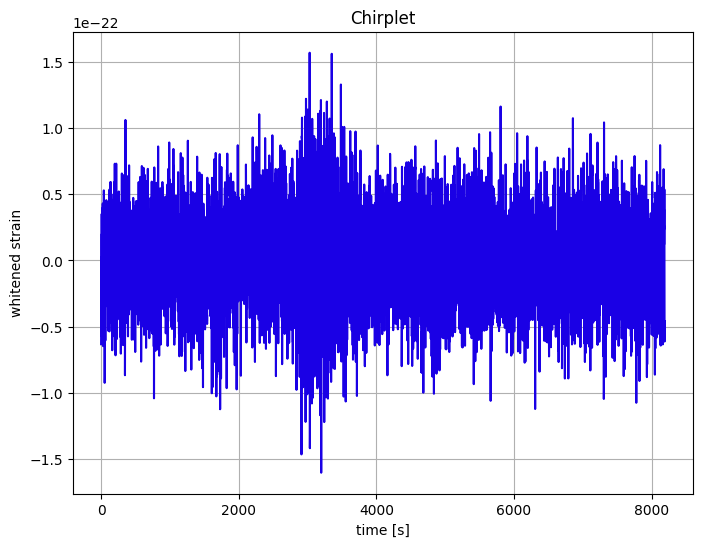

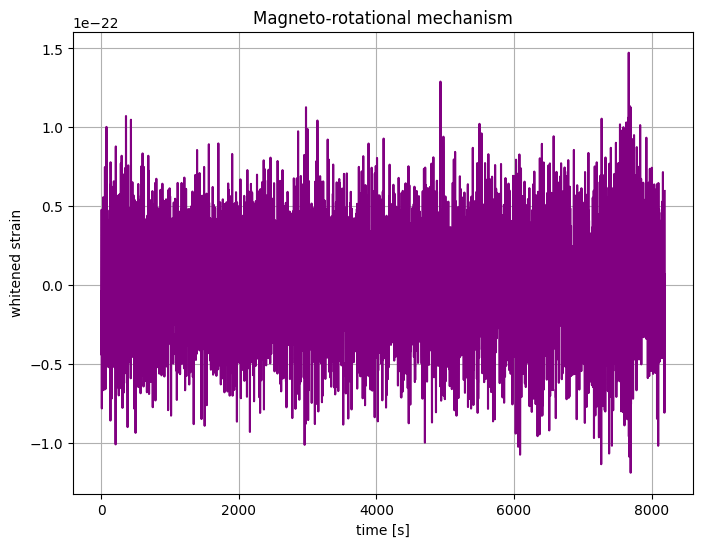

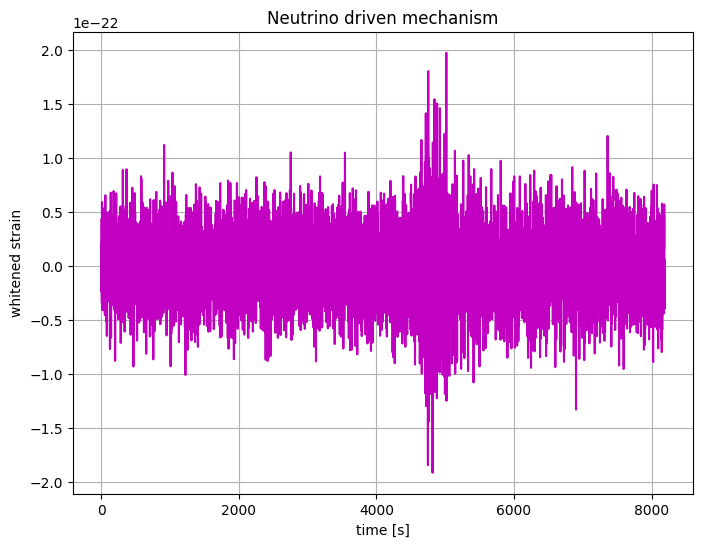

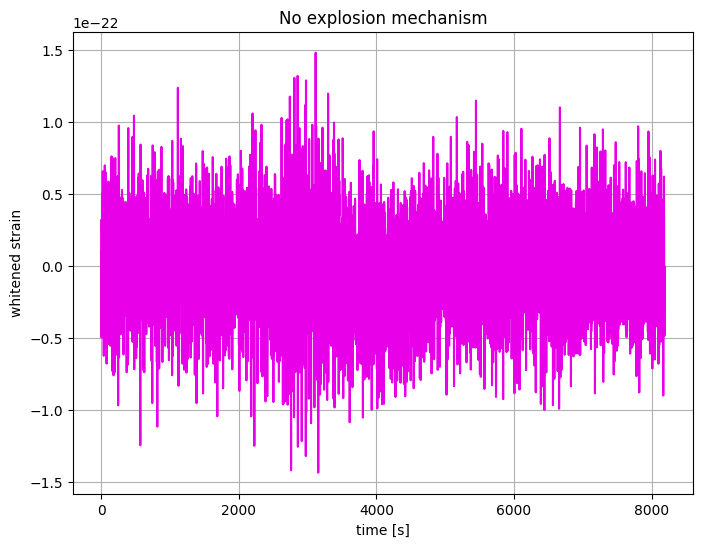

In [ ]:
# Plot the Chirplet signal
plt.figure()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')
plt.plot(chirp, label='Chirplet', color=custom_cmap(0.1))
plt.title('Chirplet')
plt.show()

# Plot the Magneto-rotational mechanism signal
plt.figure()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')
plt.plot(magrot, label='Magneto-rotational mechanism', color=custom_cmap(0.5))
plt.title('Magneto-rotational mechanism')
plt.show()

# Plot the Neutrino driven mechanism signal
plt.figure()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')
plt.plot(neutrino, label='Neutrino driven mechanism', color=custom_cmap(0.75))
plt.title('Neutrino driven mechanism')
plt.show()

# Plot the No explosion mechanism signal
plt.figure()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('whitened strain')
plt.plot(noexp, label='No explosion mechanism', color=custom_cmap(0.9))
plt.title('No explosion mechanism')
plt.show()


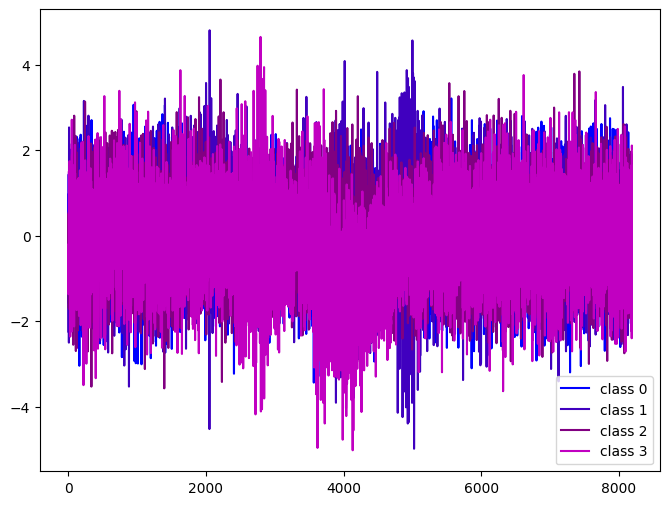

In [ ]:
# Find unique classes in the combined 'y_train' and 'y_test' arrays
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

# Create a new figure for plotting
plt.figure()

# Loop through each unique class and plot with corresponding colors from custom colormap
for i, c in enumerate(classes):
    # Extract the feature data for instances belonging to the current class ('c')
    c_x_train = x_train[y_train == c]

    # Plot the first instance ('c_x_train[0]') of the current class with a label and custom color
    plt.plot(c_x_train[0], label="class " + str(c), color=custom_cmap(i / len(classes)))

# Add a legend to the plot indicating the class labels
plt.legend(loc="best")

# Show the plot
plt.show()

# Close the plot window
plt.close()

In [ ]:
# Reshape the training data 'x_train' and testing data 'x_test'
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [ ]:
num_classes = len(np.unique(y_train))

In [ ]:
# Generate a random permutation of indices for the training data
idx = np.random.permutation(len(x_train))

# Shuffle the training data and labels based on the generated permutation
x_train = x_train[idx]
y_train = y_train[idx]


In [ ]:
try:
    import pydot
except:
    ! pip install -q "pydot"

## Build our Neural Network Model: CCN-1D

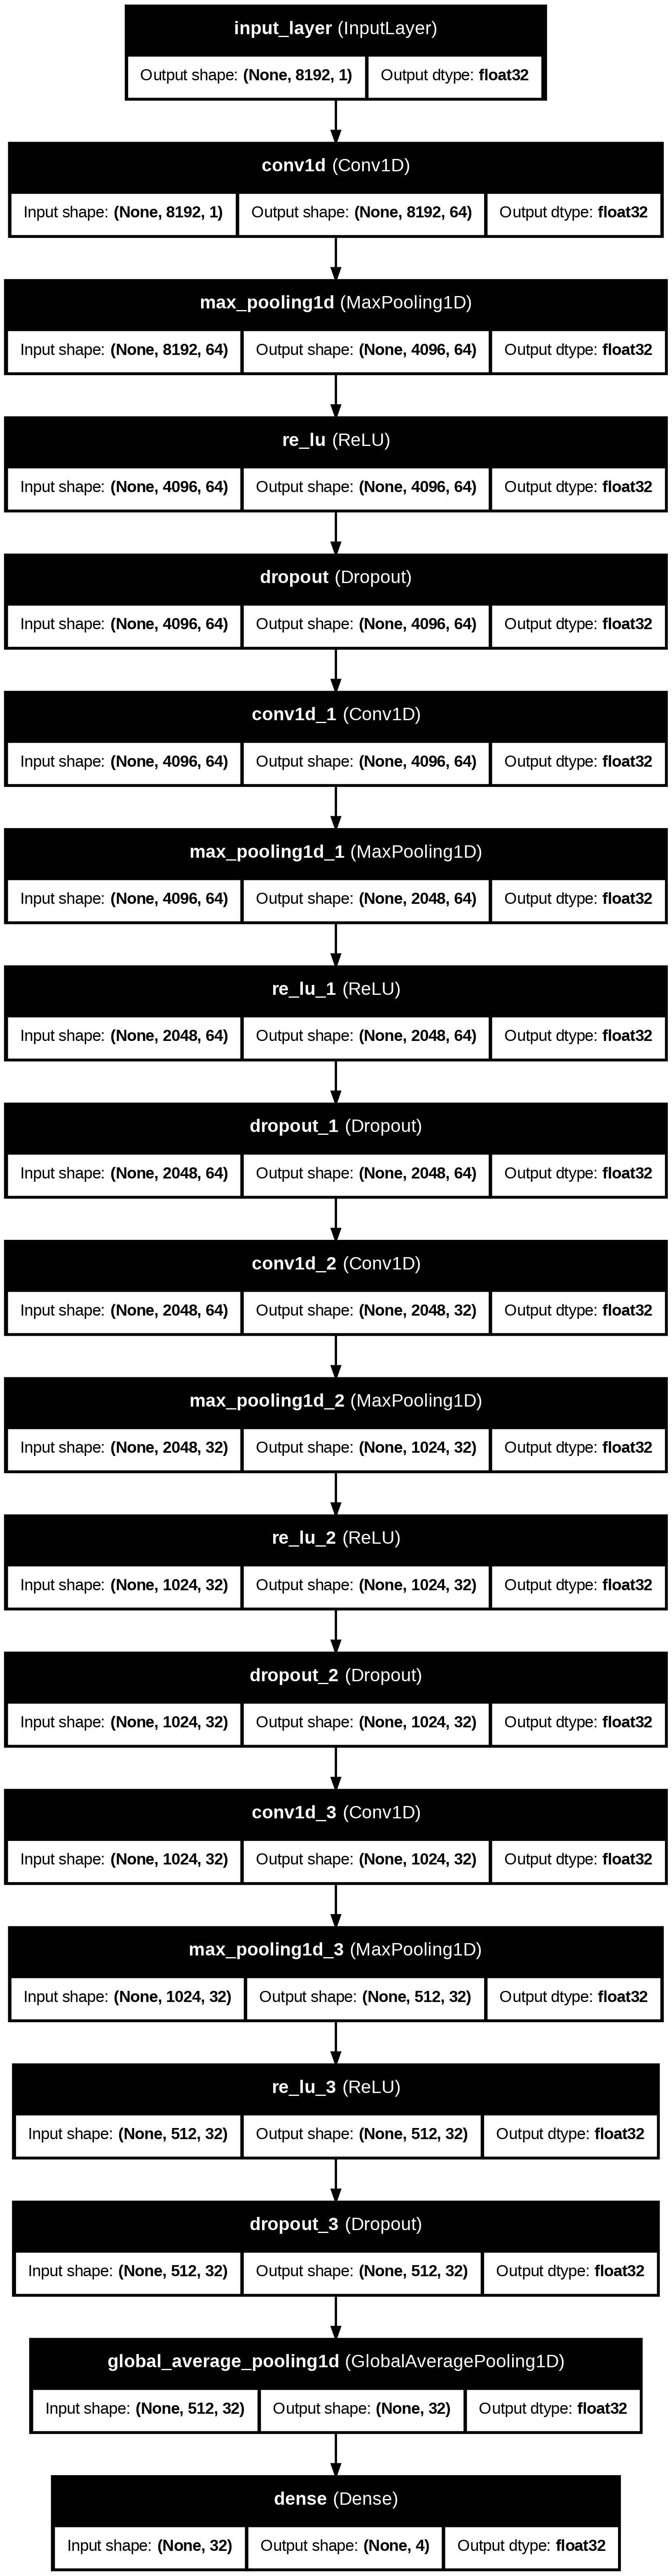

In [ ]:
# Define a function 'make_model' for creating a convolutional neural network (CNN) model
def make_model(input_shape):
    # Create an input layer with the specified 'input_shape'
    input_layer = keras.layers.Input(input_shape)

    # First convolutional layer (conv1)
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.MaxPool1D((2))(conv1)  # Max pooling layer
    conv1 = keras.layers.ReLU()(conv1)  # ReLU activation
    conv1 = keras.layers.Dropout((0.1))(conv1)  # Dropout layer for regularization

    # Second convolutional layer (conv2)
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.MaxPool1D((2))(conv2)  # Max pooling layer
    conv2 = keras.layers.ReLU()(conv2)  # ReLU activation
    conv2 = keras.layers.Dropout((0.1))(conv2)  # Dropout layer for regularization

    # Third convolutional layer (conv3)
    conv3 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.MaxPool1D((2))(conv3)  # Max pooling layer
    conv3 = keras.layers.ReLU()(conv3)  # ReLU activation
    conv3 = keras.layers.Dropout((0.1))(conv3)  # Dropout layer for regularization

    # Fourth convolutional layer (conv4)
    conv4 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.MaxPool1D((2))(conv4)  # Max pooling layer
    conv4 = keras.layers.ReLU()(conv4)  # ReLU activation
    conv4 = keras.layers.Dropout((0.1))(conv4)  # Dropout layer for regularization

    # Global Average Pooling layer (GAP)
    gap = keras.layers.GlobalAveragePooling1D()(conv4)

    # Output layer with 'num_classes' units and softmax activation
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    # Create and return the Keras Model
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

# Create the model using the 'make_model' function and specify 'input_shape'
model = make_model(input_shape=x_train.shape[1:])

# Plot the model architecture and save it as 'model.png'
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,       # Show the shapes of layers
    show_dtype=True,        # Show data types
    show_layer_names=True   # Show layer names
)


### Start training the model

In [ ]:
# Define the number of training epochs (maximum iterations)
# epochs = 500
epochs = 10  # Just for testing purposes (lower value)
batch_size = 64  # Batch size for training data

# Define a list of callbacks to be used during training
callbacks = [
    # ModelCheckpoint: Save the best model during training based on validation loss
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    # ReduceLROnPlateau: Reduce learning rate when validation loss plateaus
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    # EarlyStopping: Stop training early if validation loss does not improve
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=0),
]

# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.95,
        beta_2=0.999,
        epsilon=1e-8,
        amsgrad=True
    ),
    loss="sparse_categorical_crossentropy",  # Loss function for classification
    metrics=["accuracy"],  # Evaluation metric to monitor during training
)

# Train the model on the training data
history = model.fit(
    x_train,  # Training features
    y_train,  # Training labels
    batch_size=batch_size,  # Batch size for each training step
    epochs=epochs,  # Number of training epochs
    callbacks=callbacks,  # List of callbacks for monitoring and early stopping
    validation_split=0.2,  # Fraction of training data used for validation
    verbose=1,  # Verbosity level (1: progress bar, 0: silent)
)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.2726 - loss: 1.3849 - val_accuracy: 0.3078 - val_loss: 1.3757 - learning_rate: 0.0010
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.2894 - loss: 1.3733 - val_accuracy: 0.2851 - val_loss: 1.3722 - learning_rate: 0.0010
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.3024 - loss: 1.3680 - val_accuracy: 0.2805 - val_loss: 1.3635 - learning_rate: 0.0010
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.2999 - loss: 1.3647 - val_accuracy: 0.3379 - val_loss: 1.3393 - learning_rate: 0.0010
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.3198 - loss: 1.3349 - val_accuracy: 0.3024 - val_loss: 1.2884 - learning_rate: 0.0010
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.3581 - loss: 1.2929 - val_accuracy: 0.2878 - val_loss: 1.2873 - learning_rate: 0.0010
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.3812 - loss: 1.2604 - val_acc

In [ ]:
# Display a summary of the model's architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8192, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 8192, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4096, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 4096, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 4096, 64)            │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2048, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 2048, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 2048, 32)            │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1024, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 1024, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1024, 32)            │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 512, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 512, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,082 (344.07 KB)

 Trainable params: 22,020 (86.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,062 (258.06 KB)

### Plot the training and validation accuracy

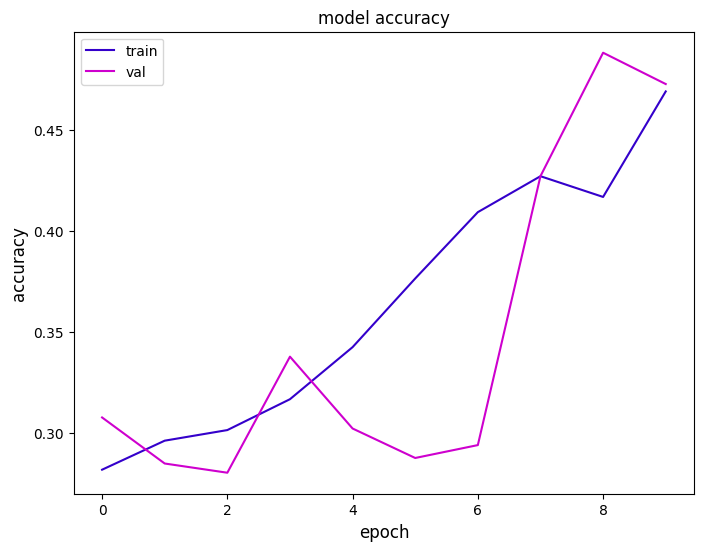

In [ ]:
# Plot the training and validation accuracy
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric], color=custom_cmap(0.2))
plt.plot(history.history["val_" + metric], color=custom_cmap(0.8))
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()


### Predict the results on test data sets

In [ ]:
# Generate predictions using the trained model on the test data
y_predicted = model.predict(x_test)

# Extract the predicted class labels by finding the index of the highest probability
y_pred = np.argmax(y_predicted, axis=1)

# Print the predicted class labels
print(y_pred)

# Define the class labels corresponding to the predicted values
labels = ["chirp", "magrot", "neutrino", "noexp"]


43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step
[3 2 0 ... 0 2 1]


### Build the confusion Matrix to show the results

The confusion matrix is a fundamental tool in evaluating the performance of a multi-class machine learning model. It provides a summary of the predictions made by the model and their correspondence to the actual classes in the dataset. In a multi-class scenario, the confusion matrix is a square matrix where each row represents the instances in a predicted class and each column represents the instances in an actual class. Here's an example of a confusion matrix for a multi-class model:

|    Predicted Class   |   Class A   |   Class B   |   Class C   |
|----------------------|-------------|-------------|-------------|
|      **Class A**     |     TP      |     FN      |     FN      |
|----------------------|-------------|-------------|-------------|
|      **Class B**     |     FP      |     TP      |     FN      |
|----------------------|-------------|-------------|-------------|
|      **Class C**     |     FN      |     FP      |     TP      |
|----------------------|-------------|-------------|-------------|


In the confusion matrix, the terms have the following meanings:
- **True Positives (TP)**: The number of instances correctly predicted as belonging to a particular class.
- **False Positives (FP)**: The number of instances incorrectly predicted as belonging to a particular class when they actually belong to a different class.
- **False Negatives (FN)**: The number of instances incorrectly predicted as not belonging to a particular class when they actually belong to that class.
To interpret the confusion matrix, you can analyze the distribution of predictions across the classes. Key metrics derived from the confusion matrix include:

* Accuracy: It measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN).
* Precision: It quantifies the model's ability to correctly identify positive instances for a given class and is calculated as TP / (TP + FP).
* Recall (also known as Sensitivity or True Positive Rate): It represents the model's ability to correctly identify positive instances out of the total actual positive instances and is calculated as TP / (TP + FN).
* F1-score: It combines precision and recall into a single metric and is calculated as the harmonic mean of precision and recall, given by 2 * (Precision * Recall) / (Precision + Recall).
By analyzing the values in the confusion matrix and these metrics, you can gain insights into the strengths and weaknesses of your multi-class machine learning model and make informed decisions about improving its performance.

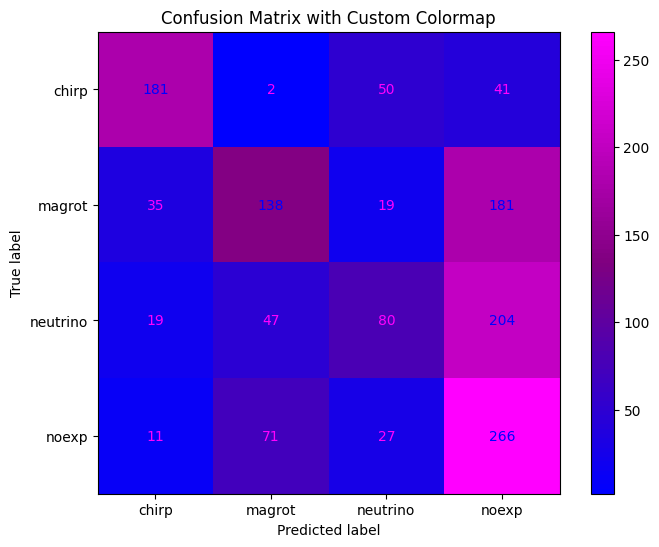

In [ ]:
# Import necessary functions and classes from scikit-learn for confusion matrix and display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix between true labels (y_test) and predicted labels (y_pred)
cm_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object with the computed confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=labels)

# Plot and display the confusion matrix with the custom colormap
disp.plot(cmap=custom_cmap)
plt.title('Confusion Matrix with Custom Colormap')
plt.show()


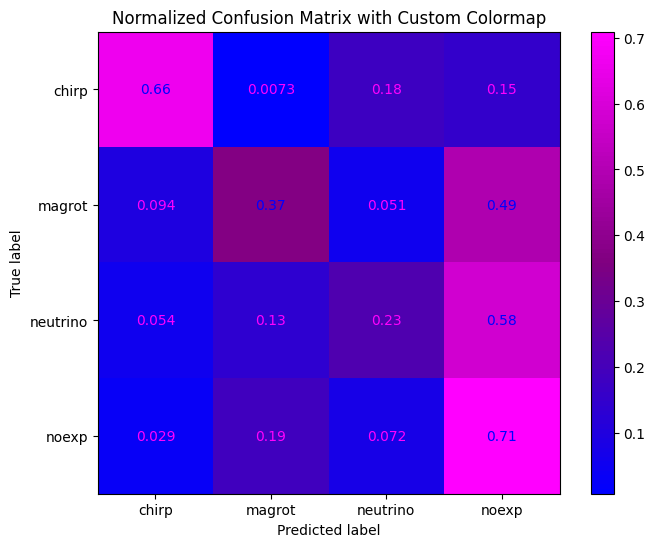

In [ ]:
# Compute the normalized confusion matrix between true labels (y_test) and predicted labels (y_pred)
cm_matrix_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Create a ConfusionMatrixDisplay object with the computed normalized confusion matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_matrix_normalized, display_labels=labels)

# Plot and display the normalized confusion matrix with the custom colormap
disp_normalized.plot(cmap=custom_cmap)
plt.title('Normalized Confusion Matrix with Custom Colormap')
plt.show()